In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100
X = 2*np.random.rand(m, 1)
y = 4+ 2*X + np.random.randn(m, 1)

In [ ]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [ ]:
y

array([[5.58520754],
       [7.50384988],
       [7.01973654],
       [4.40706502],
       [4.40440267],
       [4.98109065],
       [5.71022849],
       [6.94643436],
       [5.59596644],
       [6.33053327],
       [4.99774009],
       [8.20839052],
       [6.80001036],
       [5.36262388],
       [4.82437742],
       [5.70226303],
       [4.51491588],
       [5.77136358],
       [5.33567192],
       [3.70140161],
       [6.74353186],
       [4.81903071],
       [5.17369205],
       [5.23086024],
       [4.40890919],
       [6.72005852],
       [4.45598061],
       [5.25466048],
       [6.20837256],
       [4.58985251],
       [8.31636531],
       [4.85667431],
       [4.51775676],
       [7.72109623],
       [5.94375692],
       [7.20707552],
       [5.27868529],
       [6.85393057],
       [6.54457114],
       [6.06215732],
       [4.45344117],
       [4.8120296 ],
       [5.2803769 ],
       [8.38921464],
       [5.82615187],
       [5.74070168],
       [6.64963862],
       [4.678

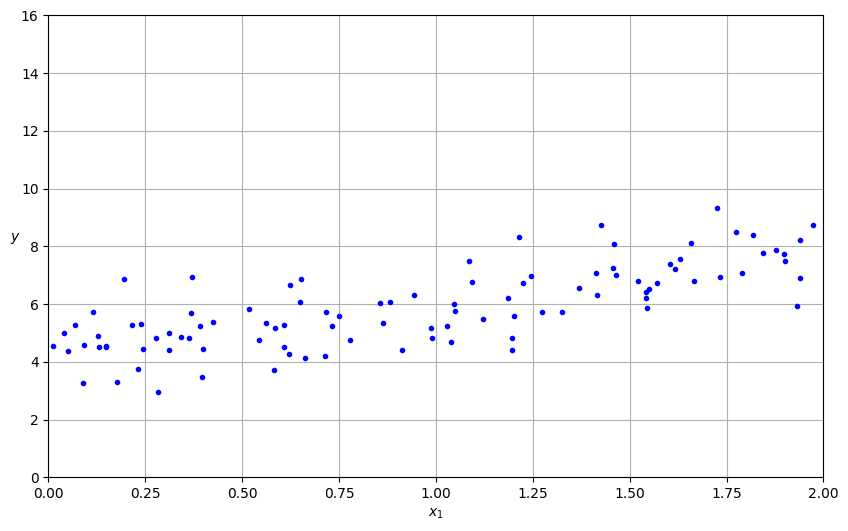

In [3]:
plt.figure(figsize = (10, 6))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0, 2, 0, 16])
plt.grid()
plt.show()

In [6]:
from sklearn.preprocessing import add_dummy_feature

In [20]:
theta_best = np.array([[3.5], [2.5]])

In [21]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[3.5],
       [8.5]])

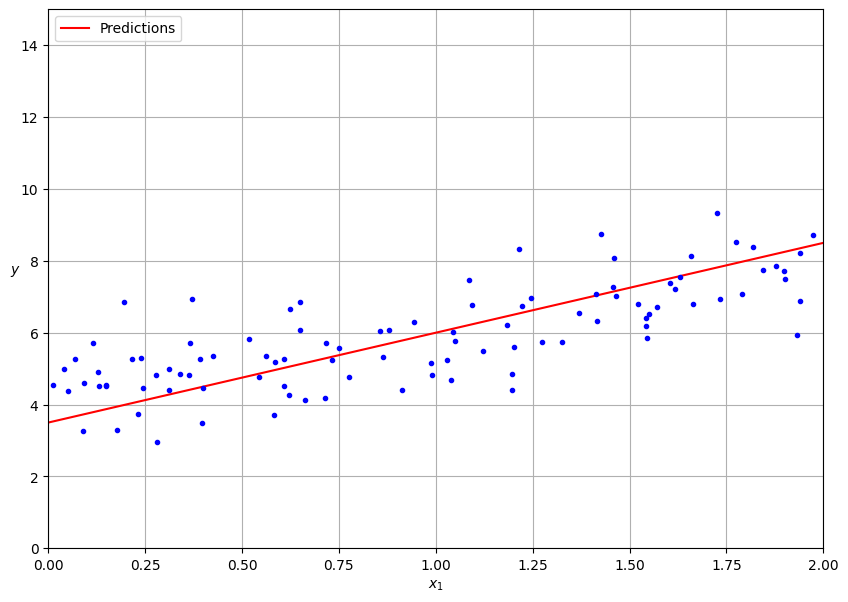

In [22]:
plt.figure(figsize = [10, 7])
plt.plot(X_new, y_predict, 'r', label = 'Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0, 2, 0 ,15])
plt.grid()
plt.legend(loc = 'upper left')

plt.show()

In [23]:
y = y.reshape(100, 1)     # X-i da ele

In [24]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)            # wx + b de b olsun deye

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y       # X transpose times  X and then inverse it and dot product X transpose and y

In [25]:
theta_best

array([[4.21509616],
       [1.77011339]])

batch

In [27]:
X_b[0]

array([1.        , 0.74908024])

In [28]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  gradient = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
  theta = theta - eta *gradient

In [29]:
theta

array([[4.21509616],
       [1.77011339]])

In [30]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01,
                       n_iter_no_change = 100, random_state=42)
sgd_reg.fit(X, y.ravel())       #ravel reduces dimension to 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [31]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21154695]), array([1.77379754]))

stoc

In [32]:
np.random.seed(42)

eta = 0.1
m = len(X_b)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @(xi @ theta - yi)
    theta = theta - eta * gradients

In [33]:
theta

array([[4.17686315],
       [1.85986577]])

mini batch

In [34]:
from math import ceil

n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20
n_bathces_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_bathces_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx : idx + minibatch_size]
    gradients = 2 / minibatch_size * xi.T @(xi @theta - yi)
    theta = theta - eta * gradients

In [35]:
theta

array([[4.22015491],
       [1.77052006]])